US Accidents Exploratory Data Analysis

-Todo some EDA  
-get some infromation about accidents  
-info can be used to prevent accidents  
-does not contain data about NY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Initial Steps
1.Load the File using Pandas  
2.Look at some information about the data and the columns  
3.Fix any missing or incorrect values

In [4]:
from google.colab import drive
drive.mount('/content/drive')  #connect drive to collab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
file_path = '/content/drive/MyDrive/datascience/US_Accidents_March23.csv'
df = pd.read_csv(file_path, nrows=2000000)

df.shape
df.head()

ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   
2   False  False           False           True        False          Night   
3   False  False           False          False        False          Night   
4   False  False           False           True        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                   Day  
2          Night               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

In [12]:
df

ID   Source  Severity           Start_Time  \
0              A-1  Source2         3  2016-02-08 05:46:00   
1              A-2  Source2         2  2016-02-08 06:07:59   
2              A-3  Source2         2  2016-02-08 06:49:27   
3              A-4  Source2         3  2016-02-08 07:23:34   
4              A-5  Source2         2  2016-02-08 07:39:07   
...            ...      ...       ...                  ...   
1999995  A-2009858  Source2         3  2019-08-07 13:34:02   
1999996  A-2009859  Source2         3  2019-08-07 13:34:33   
1999997  A-2009860  Source2         2  2019-08-07 14:56:57   
1999998  A-2009861  Source2         2  2019-08-07 15:37:01   
1999999  A-2009862  Source2         2  2019-08-07 16:44:32   

                    End_Time  Start_Lat  Start_Lng  End_Lat  End_Lng  \
0        2016-02-08 11:00:00  39.865147 -84.058723      NaN      NaN   
1        2016-02-08 06:37:59  39.928059 -82.831184      NaN      NaN   
2        2016-02-08 07:19:27  39.063148 -84.032608      NaN      NaN   
3        2016-02-08 07:53:34  39.747753 -84.205582      NaN      NaN   
4        2016-02-08 08:09:07  39.627781 -84.188354      NaN      NaN   
...                      ...        ...        ...      ...      ...   
1999995  2019-08-07 15:04:52  29.516211 -98.410995      NaN      NaN   
1999996  2019-08-07 15:04:53  29.431683 -98.500229      NaN      NaN   
1999997  2019-08-07 15:41:42  29.417839 -98.657707      NaN      NaN   
1999998  2019-08-07 16:21:39  29.531349 -98.496567      NaN      NaN   
1999999  2019-08-07 18:32:27  29.437599 -98.447906      NaN      NaN   

         Distance(mi)  ... Roundabout Station   Stop Traffic_Calming  \
0                0.01  ...      False   False  False           False   
1                0.01  ...      False   False  False           False   
2                0.01  ...      False   False  False           False   
3                0.01  ...      False   False  False           False   
4                0.01  ...      False   False  False           False   
...               ...  ...        ...     ...    ...             ...   
1999995          0.00  ...      False   False  False           False   
1999996          0.00  ...      False   False  False           False   
1999997          0.00  ...      False   False  False           False   
1999998          0.00  ...      False   False  False           False   
1999999          0.00  ...      False   False  False           False   

        Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0                False        False          Night          Night   
1                False        False          Night          Night   
2                 True        False          Night          Night   
3                False        False          Night            Day   
4                 True        False            Day            Day   
...                ...          ...            ...            ...   
1999995           True        False            Day            Day   
1999996          False        False            Day            Day   
1999997          False        False            Day            Day   
1999998           True        False            Day            Day   
1999999          False        False            Day            Day   

        Nautical_Twilight Astronomical_Twilight  
0                   Night                 Night  
1                   Night                   Day  
2                     Day                   Day  
3                     Day                   Day  
4                     Day                   Day  
...                   ...                   ...  
1999995               Day                   Day  
1999996               Day                   Day  
1999997               Day                   Day  
1999998               Day                   Day  
1999999               Day                   Day  

[2000000 rows x 46 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   Severity               100000 non-null  int64  
 3   Start_Time             100000 non-null  object 
 4   End_Time               100000 non-null  object 
 5   Start_Lat              100000 non-null  float64
 6   Start_Lng              100000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           100000 non-null  float64
 10  Description            100000 non-null  object 
 11  Street                 100000 non-null  object 
 12  City                   99999 non-null   object 
 13  County                 100000 non-null  object 
 14  State                  100000 non-nul

In [14]:
df.describe().transpose()

count       mean        std         min         25%  \
Severity           2000000.0   2.318935   0.517771    1.000000    2.000000   
Start_Lat          2000000.0  36.058440   4.842643   24.554800   33.050893   
Start_Lng          2000000.0 -93.643735  16.618987 -124.497414 -111.892052   
End_Lat                  0.0        NaN        NaN         NaN         NaN   
End_Lng                  0.0        NaN        NaN         NaN         NaN   
Distance(mi)       2000000.0   0.216653   1.653574    0.000000    0.000000   
Temperature(F)     1967042.0  62.993565  18.103239  -89.000000   51.000000   
Wind_Chill(F)      1514711.0  59.865873  21.075528  -89.000000   45.000000   
Humidity(%)        1964313.0  66.161504  22.297749    1.000000   50.000000   
Pressure(in)       1972869.0  29.516073   0.946299    0.120000   29.300000   
Visibility(mi)     1963148.0   9.102687   2.476175    0.000000   10.000000   
Wind_Speed(mph)    1877669.0   7.429139   5.373457    0.000000    4.600000   
Precipitation(in)  1484137.0   0.008789   0.127703    0.000000    0.000000   

                         50%        75%         max  
Severity            2.000000   3.000000    4.000000  
Start_Lat          35.311180  40.024559   49.002201  
Start_Lng         -87.444179 -80.852631  -67.553307  
End_Lat                  NaN        NaN         NaN  
End_Lng                  NaN        NaN         NaN  
Distance(mi)        0.000000   0.000000  441.750000  
Temperature(F)     65.000000  77.000000  203.000000  
Wind_Chill(F)      63.000000  76.000000  196.000000  
Humidity(%)        69.000000  85.000000  100.000000  
Pressure(in)       29.800000  30.000000   58.320000  
Visibility(mi)     10.000000  10.000000  111.000000  
Wind_Speed(mph)     7.000000  10.000000  822.800000  
Precipitation(in)   0.000000   0.000000   36.470000

In [16]:
numerics=['int16','int32','int64','float16','float32','float64']
numeric_df=df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

In [21]:
missing_percentages=df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages

End_Lng                  1.000000
End_Lat                  1.000000
Precipitation(in)        0.257931
Wind_Chill(F)            0.242645
Wind_Speed(mph)          0.061165
Visibility(mi)           0.018426
Humidity(%)              0.017844
Weather_Condition        0.017834
Wind_Direction           0.017763
Temperature(F)           0.016479
Pressure(in)             0.013565
Weather_Timestamp        0.011548
Airport_Code             0.001852
Street                   0.000856
Astronomical_Twilight    0.000829
Nautical_Twilight        0.000829
Civil_Twilight           0.000829
Sunrise_Sunset           0.000829
Timezone                 0.000727
Zipcode                  0.000154
City                     0.000023
Description              0.000002
ID                       0.000000
Distance(mi)             0.000000
Start_Lng                0.000000
Source                   0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
County                   0.000000
Amenity                  0.000000
Country                  0.000000
State                    0.000000
Bump                     0.000000
Crossing                 0.000000
Give_Way                 0.000000
Junction                 0.000000
Station                  0.000000
Roundabout               0.000000
Railway                  0.000000
No_Exit                  0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calming          0.000000
Stop                     0.000000
dtype: float64

<Axes: >

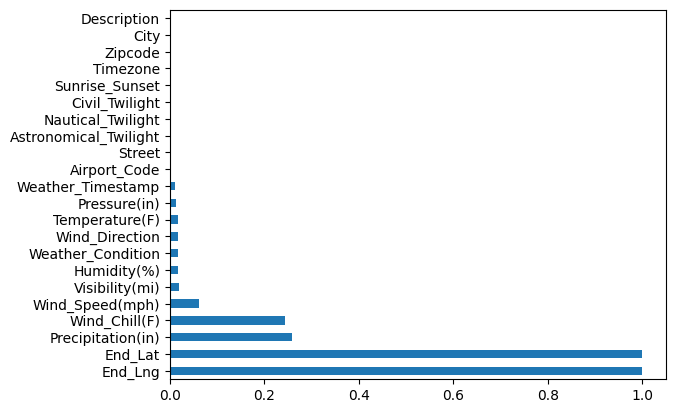

In [23]:
missing_percentages[missing_percentages!=0].plot(kind='barh')

Remove the columns that we dont want to use

**EDA and Visualization**  

columns we will analyze  

1.City  

2.Start Time  

3.Start Lat, Start Long  

4.Weather Condition


In [29]:
cities=df.City.unique()
len(cities)

10296

In [6]:
cities_by_accidents=df.City.value_counts()
cities_by_accidents

City
Houston                68395
Dallas                 48848
Los Angeles            41154
Charlotte              40029
Austin                 39188
                       ...  
Long Beach Township        1
Fountaintown               1
Belhaven                   1
Curtis                     1
Mount Hope                 1
Name: count, Length: 10295, dtype: int64

In [32]:
cities_by_accidents[:100]

City
Houston        68395
Dallas         48848
Los Angeles    41154
Charlotte      40029
Austin         39188
               ...  
Santa Rosa      2927
Shreveport      2898
Fairfield       2898
Tacoma          2897
Albuquerque     2870
Name: count, Length: 100, dtype: int64

In [35]:
'New York' in df.City  #NEW YORK not present

False

<Axes: ylabel='City'>

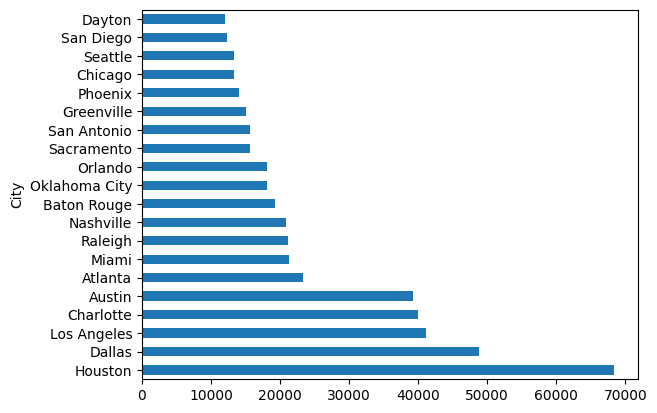

In [7]:
cities_by_accidents[:20].plot(kind='barh')

In [8]:
import seaborn as sns
sns.set_style('darkgrid')

<Axes: xlabel='count', ylabel='Count'>

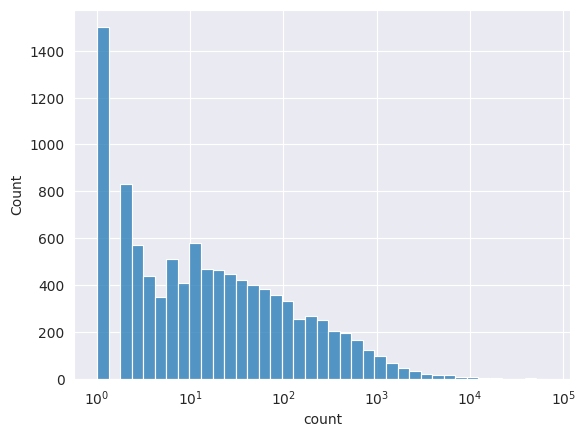

In [19]:
sns.histplot(cities_by_accidents,log_scale=True)

In [21]:
len(cities_by_accidents[cities_by_accidents==1])

1500

###Start Time

In [25]:
pd.to_datetime(df.Start_Time)
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

<Axes: xlabel='Hour', ylabel='Percent'>

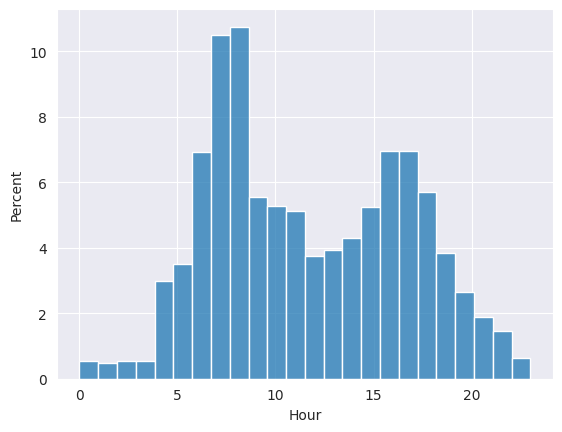

In [30]:
df['Hour'] = df['Start_Time'].dt.hour
df['Hour']
sns.histplot(df.Hour,bins=24, stat='percent')

-A high percentage of accidents occur between 6AM to 10 AM  
-3PM to 6PM also seems to be the time when accidents usually happen

<Axes: xlabel='DayOfWeek', ylabel='Percent'>

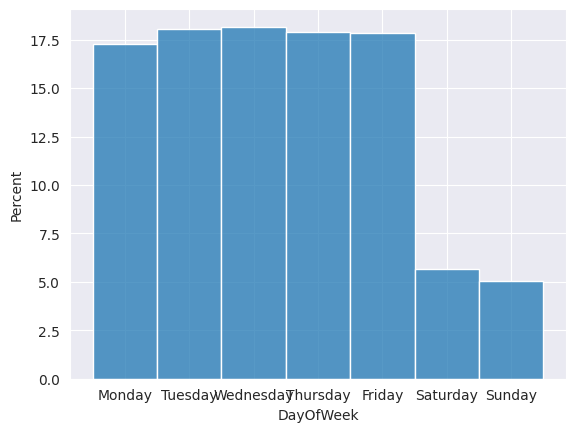

In [38]:
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
sns.histplot(df.DayOfWeek, stat='percent',bins=7)

Now we know that most accidents happen on weekdays   
Let us check if distribution of accidents by hour same on weekends

<Axes: xlabel='Hour', ylabel='Percent'>

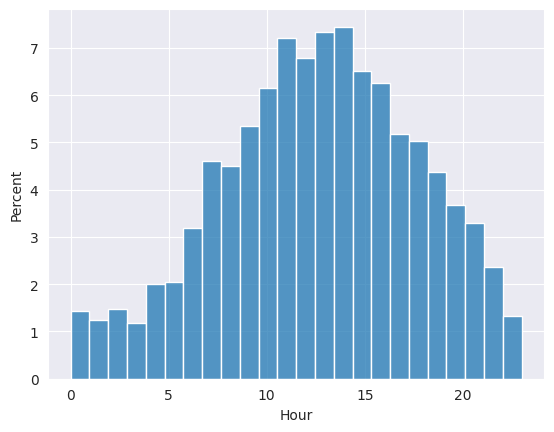

In [40]:
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek
weekend_df = df[df['DayOfWeek'] >= 5]
sns.histplot(weekend_df.Hour, bins=24, stat='percent')

On Weekends accidents mostly happened between 11 Am to 3PM

<Axes: xlabel='Month', ylabel='Percent'>

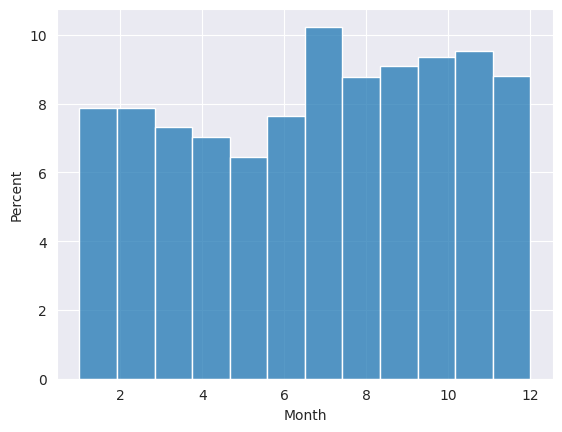

In [41]:
df['Month'] = df['Start_Time'].dt.month
sns.histplot(df.Month, bins=12, stat='percent')

Months of winters report more accidents than of summers

In [43]:
df.Source.value_counts()

Source
Source2    1921705
Source3      78295
Name: count, dtype: int64

In [44]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
1999995    29.516211
1999996    29.431683
1999997    29.417839
1999998    29.531349
1999999    29.437599
Name: Start_Lat, Length: 2000000, dtype: float64

In [45]:
df.Start_Lng

0         -84.058723
1         -82.831184
2         -84.032608
3         -84.205582
4         -84.188354
             ...    
1999995   -98.410995
1999996   -98.500229
1999997   -98.657707
1999998   -98.496567
1999999   -98.447906
Name: Start_Lng, Length: 2000000, dtype: float64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

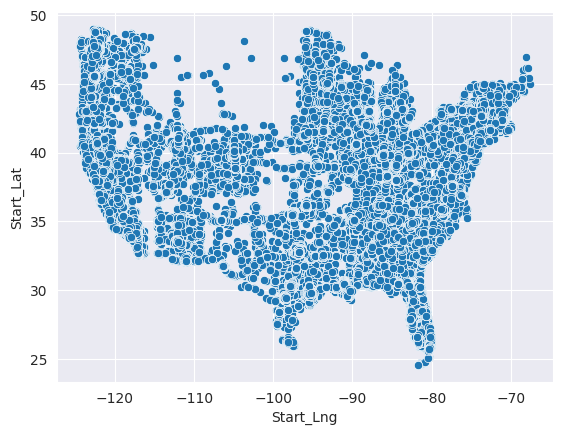

In [47]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat)

In [56]:
import folium
from folium.plugins import HeatMap

sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(n=200000, random_state=42)

# Create a folium Map centered at the average location
map_center = [sample_df['Start_Lat'].mean(), sample_df['Start_Lng'].mean()]
heat_map = folium.Map(location=map_center, zoom_start=6)

# Add heatmap layer
HeatMap(data=sample_df[['Start_Lat', 'Start_Lng']].values, radius=8).add_to(heat_map)

# Show the map
heat_map



<Axes: xlabel='Severity', ylabel='count'>

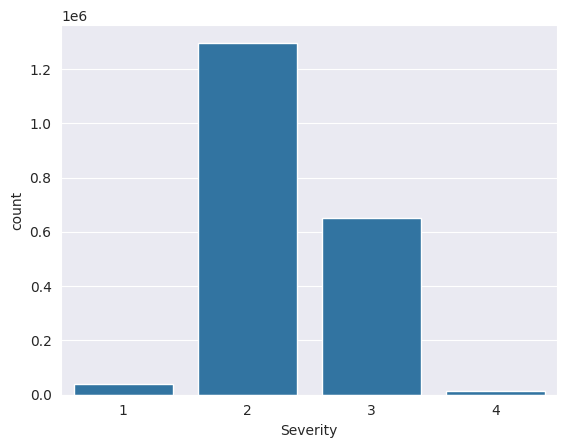

In [57]:
sns.countplot(data=df, x='Severity')

<Axes: xlabel='Severity', ylabel='Visibility(mi)'>

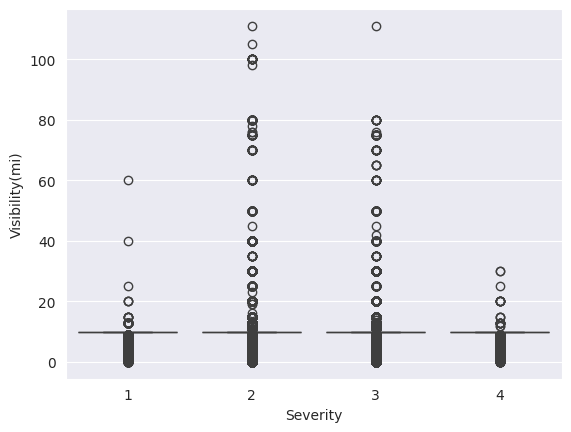

In [58]:
sns.boxplot(x='Severity', y='Visibility(mi)', data=df)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Fair'),
  Text(1, 0, 'Mostly Cloudy'),
  Text(2, 0, 'Cloudy'),
  Text(3, 0, 'Clear'),
  Text(4, 0, 'Partly Cloudy'),
  Text(5, 0, 'Light Rain'),
  Text(6, 0, 'Overcast'),
  Text(7, 0, 'Scattered Clouds'),
  Text(8, 0, 'Fog'),
  Text(9, 0, 'Light Snow')])

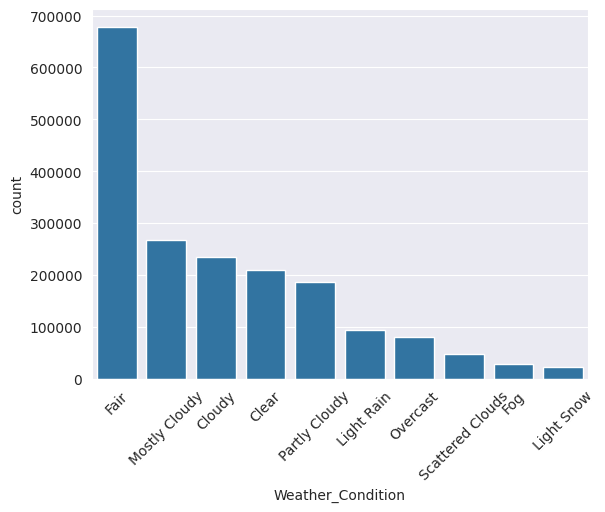

In [60]:
 import matplotlib.pyplot as plt
 sns.countplot(data=df, x='Weather_Condition', order=df['Weather_Condition'].value_counts().head(10).index)
plt.xticks(rotation=45)

### summary and conclusions
insights:  
-No data from New York  
-Number of accidents per city decreases exponentially  
-Around  3% of cities have more than 1000 accidents   
-1500 cities have reported just 1 accident  
-Months of winters report more accidents than of summers  
-On Weekends accidents mostly happened between 11 Am to 3PM  
-On Weekdays a high percentage of accidents occur between 6AM to 10 AM,
3PM to 6PM also seems to be the time when accidents usually happen.  
-Most accidents are of medium severity  
-Sunny days experience more traffic hence more accidents
